In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [3]:
X = pd.read_csv("MRegularSeasonDetailedResults.csv")

In [4]:
X.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [5]:
X.columns.values

array(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF'], dtype=object)

In [6]:
X.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,107634.000000,107634.000000,107634.000000,107634.000000,107634.000000,107634.000000,107634.000000,107634.000000,107634.000000,107634.000000,...,107634.000000,107634.000000,107634.000000,107634.000000,107634.000000,107634.000000,107634.000000,107634.000000,107634.000000,107634.000000
mean,2013.178568,71.116497,1287.976011,75.602263,1282.394922,63.637141,0.068696,26.283163,55.554676,7.266514,...,19.960440,12.050254,17.746883,10.646784,21.681495,11.404621,14.074948,5.995252,2.859998,18.988851
std,5.959825,35.604387,105.089471,11.011601,104.364474,10.857055,0.305692,4.678490,7.480500,3.101288,...,6.031125,5.342164,7.096049,4.230254,4.529964,3.724170,4.381453,2.748114,2.020505,5.420088
min,2003.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000,10.000000,26.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,40.000000,1199.000000,68.000000,1191.000000,56.000000,0.000000,23.000000,50.000000,5.000000,...,16.000000,8.000000,13.000000,8.000000,19.000000,9.000000,11.000000,4.000000,1.000000,16.000000
50%,2013.000000,75.000000,1287.000000,75.000000,1281.000000,63.000000,0.000000,26.000000,55.000000,7.000000,...,20.000000,12.000000,17.000000,10.000000,22.000000,11.000000,14.000000,6.000000,3.000000,19.000000
75%,2018.000000,102.000000,1380.000000,83.000000,1373.000000,71.000000,0.000000,29.000000,60.000000,9.000000,...,24.000000,15.000000,22.000000,13.000000,25.000000,14.000000,17.000000,8.000000,4.000000,22.000000
max,2023.000000,132.000000,1477.000000,149.000000,1477.000000,144.000000,6.000000,57.000000,103.000000,26.000000,...,59.000000,42.000000,61.000000,36.000000,49.000000,31.000000,41.000000,22.000000,18.000000,45.000000


In [7]:
X.nunique()

Season      21
DayNum     133
WTeamID    368
WScore     104
LTeamID    368
LScore     105
WLoc         3
NumOT        7
WFGM        45
WFGA        72
WFGM3       27
WFGA3       56
WFTM        50
WFTA        66
WOR         37
WDR         47
WAst        39
WTO         33
WStl        27
WBlk        21
WPF         41
LFGM        42
LFGA        75
LFGM3       23
LFGA3       57
LFTM        43
LFTA        60
LOR         36
LDR         44
LAst        32
LTO         42
LStl        23
LBlk        19
LPF         43
dtype: int64

In [7]:
X.isna().sum()

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
WFGM       0
WFGA       0
WFGM3      0
WFGA3      0
WFTM       0
WFTA       0
WOR        0
WDR        0
WAst       0
WTO        0
WStl       0
WBlk       0
WPF        0
LFGM       0
LFGA       0
LFGM3      0
LFGA3      0
LFTM       0
LFTA       0
LOR        0
LDR        0
LAst       0
LTO        0
LStl       0
LBlk       0
LPF        0
dtype: int64

In [8]:
print('NumOT > 3: ', (X.NumOT > 3).sum())
print('NumOT > 4: ', (X.NumOT > 4).sum())
print('NumOT > 5: ', (X.NumOT > 5).sum())

NumOT > 3:  39
NumOT > 4:  6
NumOT > 5:  1


In [73]:
X.loc[X.NumOT > 4, 'NumOT']

12113    5
19151    5
26534    5
33996    6
53666    5
69583    5
Name: NumOT, dtype: int64

In [31]:
print('WFGM3 > 20: ', (X.WFGM3 > 20).sum())
print('WFGM3 > 24: ', (X.WFGM3 > 24).sum())
X.loc[X.WFGM3 == 26]

WFGM3 > 20:  37
WFGM3 > 24:  2


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
76654,2018,11,1172,110,1149,62,H,0,35,70,...,24,6,10,9,26,11,14,1,1,17


In [32]:
X.loc[76654]

Season     2018
DayNum       11
WTeamID    1172
WScore      110
LTeamID    1149
LScore       62
WLoc          H
NumOT         0
WFGM         35
WFGA         70
WFGM3        26
WFGA3        53
WFTM         14
WFTA         17
WOR          10
WDR          31
WAst         29
WTO           1
WStl          6
WBlk          1
WPF          12
LFGM         25
LFGA         62
LFGM3         6
LFGA3        24
LFTM          6
LFTA         10
LOR           9
LDR          26
LAst         11
LTO          14
LStl          1
LBlk          1
LPF          17
Name: 76654, dtype: object

In [35]:
print('LBlk > 12: ', (X.LBlk > 12).sum())
print('LBlk > 14: ', (X.LBlk > 14).sum())
print('LBlk > 16: ', (X.LBlk > 16).sum())

LBlk > 12:  50
LBlk > 14:  12
LBlk > 16:  4


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

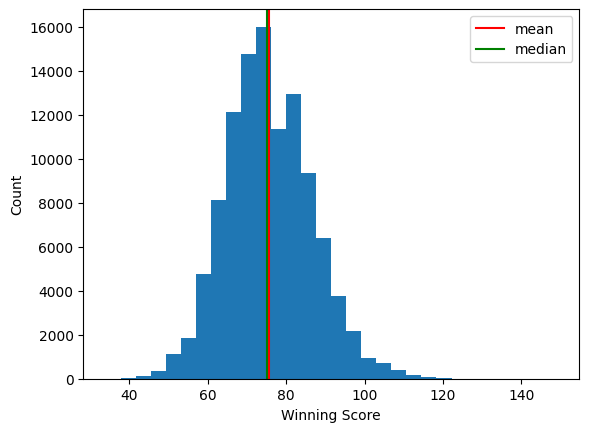

In [9]:
plt.hist(X.WScore, bins=30)
plt.axvline(X.WScore.mean(), color = 'red', label = 'mean')
plt.axvline(X.WScore.median(), color = 'g', label = 'median')
plt.xlabel('Winning Score')
plt.ylabel('Count')
plt.legend()
plt.show()

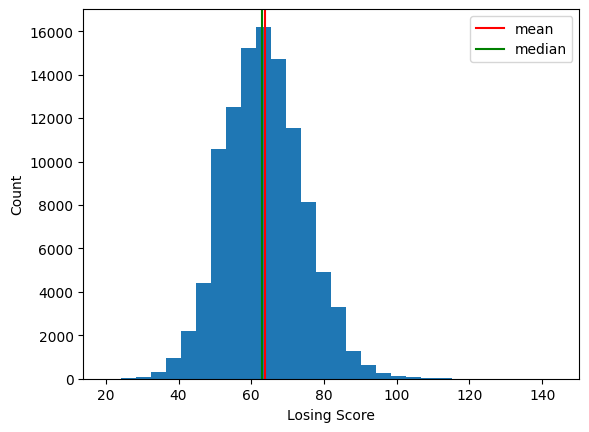

In [10]:
plt.hist(X.LScore, bins=30)
plt.axvline(X.LScore.mean(), color = 'red', label = 'mean')
plt.axvline(X.LScore.median(), color = 'g', label = 'median')
plt.xlabel('Losing Score')
plt.ylabel('Count')
plt.legend()
plt.show()

Text(0, 0.5, 'Steals')

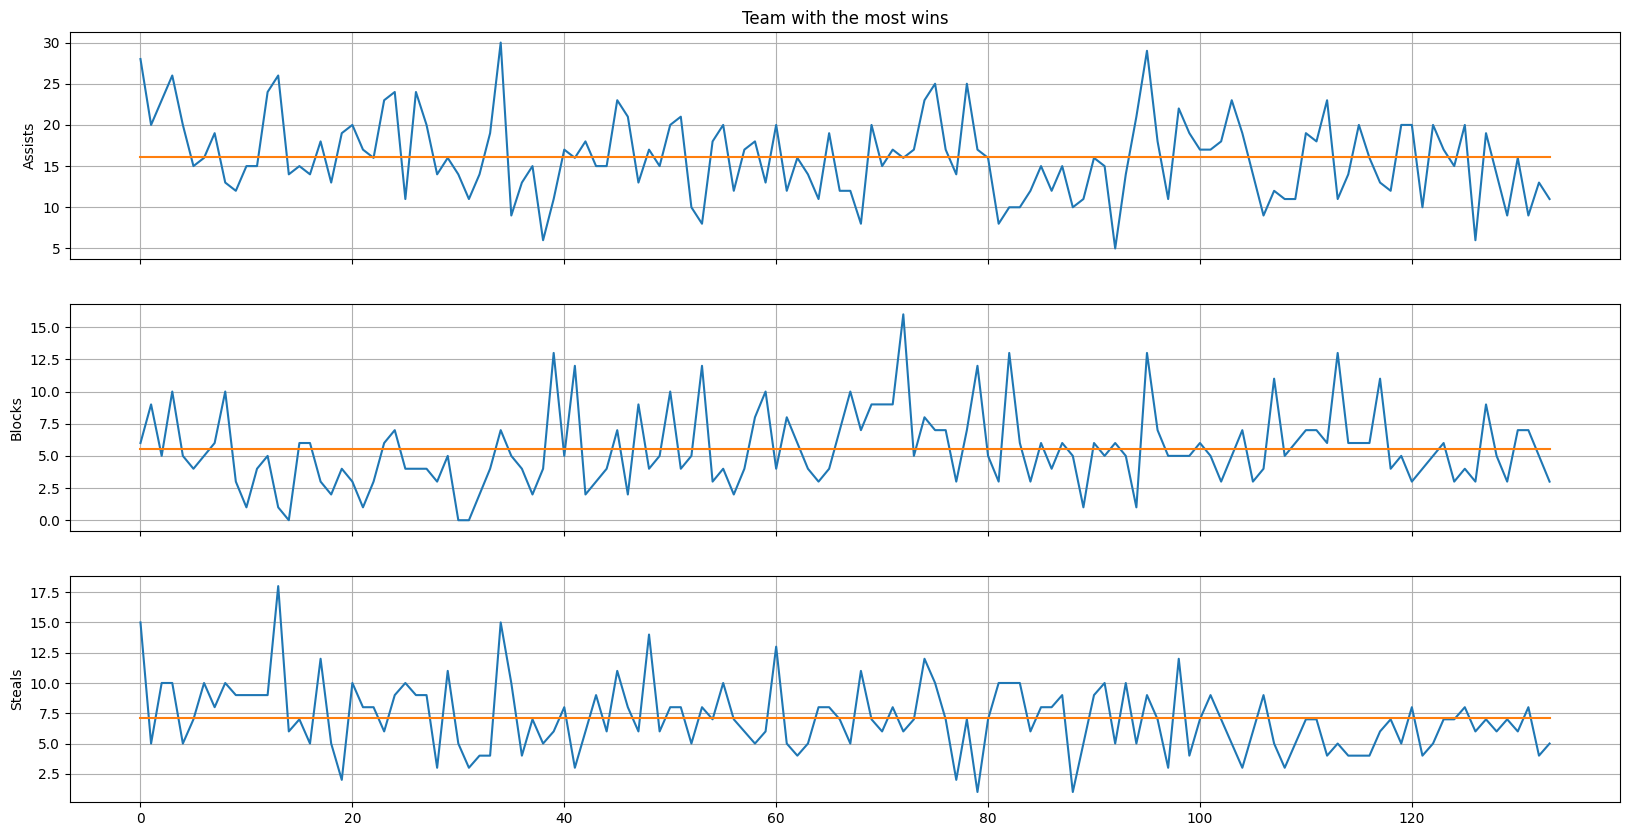

In [75]:
X_tmp = X[(X['Season'] >= 2011) & (X['Season'] <= 2014)]
most_wins_ID = X_tmp['WTeamID'].value_counts().idxmax()
assists = []
blocks = []
steals = []

for index, row in X_tmp.iterrows():
    if row['WTeamID'] == most_wins_ID:
        assists.append(row['WAst'])
        blocks.append(row['WBlk'])
        steals.append(row['WStl'])
    elif row['LTeamID'] == most_wins_ID:
        assists.append(row['LAst'])
        blocks.append(row['LBlk'])
        steals.append(row['LStl'])

fig, ax = plt.subplots(3, 1, figsize=(20,10), sharex = True)
assists_mean = [np.mean(assists)] * len(assists)
ax[0].plot([x for x in range(len(assists))], assists)
ax[0].plot([x for x in range(len(assists))], assists_mean)
ax[0].set_title('Team with the most wins')
ax[0].grid()
ax[0].set_ylabel('Assists')

blocks_mean = [np.mean(blocks)] * len(blocks)
ax[1].plot([x for x in range(len(blocks))], blocks)
ax[1].plot([x for x in range(len(blocks))], blocks_mean)
ax[1].grid()
ax[1].set_ylabel('Blocks')

steals_mean = [np.mean(steals)] * len(steals)
ax[2].plot([x for x in range(len(steals))], steals)
ax[2].plot([x for x in range(len(steals))], steals_mean)
ax[2].grid()
ax[2].set_ylabel('Steals')

Text(0, 0.5, 'Steals')

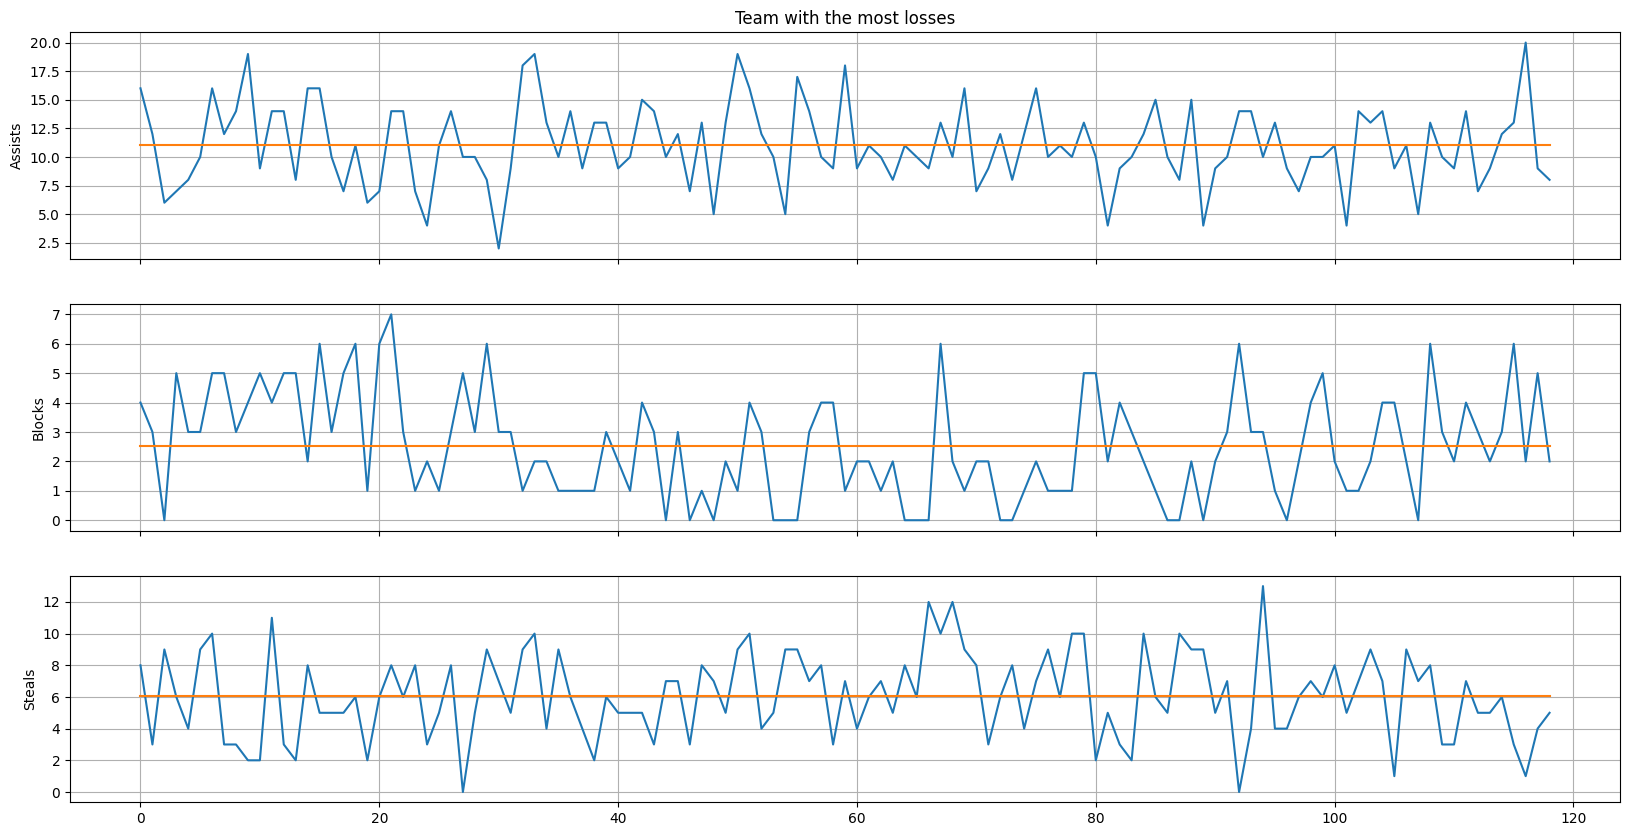

In [76]:
most_losses_ID = X_tmp['LTeamID'].value_counts().idxmax()
assists = []
blocks = []
steals = []

for index, row in X_tmp.iterrows():
    if row['WTeamID'] == most_losses_ID:
        assists.append(row['WAst'])
        blocks.append(row['WBlk'])
        steals.append(row['WStl'])
    elif row['LTeamID'] == most_losses_ID:
        assists.append(row['LAst'])
        blocks.append(row['LBlk'])
        steals.append(row['LStl'])

fig, ax = plt.subplots(3, 1, figsize=(20,10), sharex = True)
assists_mean = [np.mean(assists)] * len(assists)
ax[0].plot([x for x in range(len(assists))], assists)
ax[0].plot([x for x in range(len(assists))], assists_mean)
ax[0].set_title('Team with the most losses')
ax[0].grid()
ax[0].set_ylabel('Assists')

blocks_mean = [np.mean(blocks)] * len(blocks)
ax[1].plot([x for x in range(len(blocks))], blocks)
ax[1].plot([x for x in range(len(blocks))], blocks_mean)
ax[1].grid()
ax[1].set_ylabel('Blocks')

steals_mean = [np.mean(steals)] * len(steals)
ax[2].plot([x for x in range(len(steals))], steals)
ax[2].plot([x for x in range(len(steals))], steals_mean)
ax[2].grid()
ax[2].set_ylabel('Steals')

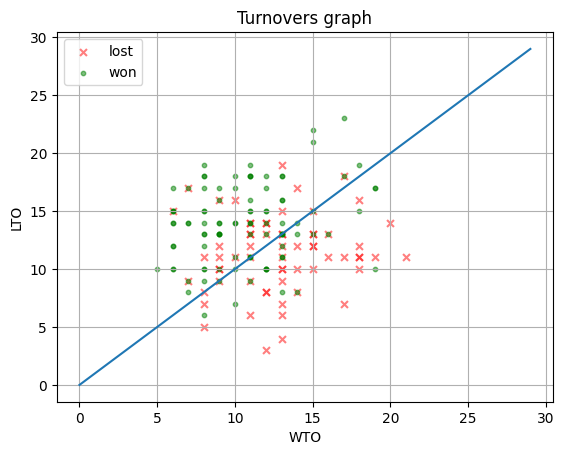

In [49]:
team = 1350
filtered_X = X_tmp[(X_tmp['WTeamID'] == team) | (X_tmp['LTeamID'] == team)]

mask_to = filtered_X.WTeamID==team

plt.scatter(filtered_X.loc[~mask_to,'WTO'], filtered_X.loc[~mask_to,'LTO'], s=25, marker='x',alpha=0.5, c='r', label='lost')
plt.scatter(filtered_X.loc[mask_to,'WTO'], filtered_X.loc[mask_to,'LTO'], alpha=0.5, s = 10, c='g', label='won')
plt.xlabel('WTO')
plt.ylabel('LTO')
diagonal_X = range(0,30,1)
diagonal_Y = diagonal_X
plt.title('Turnovers graph')
plt.grid()
plt.plot(diagonal_X,diagonal_Y)
plt.legend(loc='best')
plt.show()

([<matplotlib.patches.Wedge at 0x2241e6dce80>,
 [Text(-0.5496106035976375, 0.9528526561924675, 'Winner has more'),
  Text(-0.42967929999482174, -1.012608364154652, 'Equal number'),
  Text(0.6624638099173203, -0.8781467420367901, 'Loser has more')],
 [Text(-0.2997876019623477, 0.5197378124686186, '66.65%'),
  Text(-0.23437052726990273, -0.5523318349934464, '3.92%'),
  Text(0.3613438963185383, -0.47898913202006727, '29.43%')])

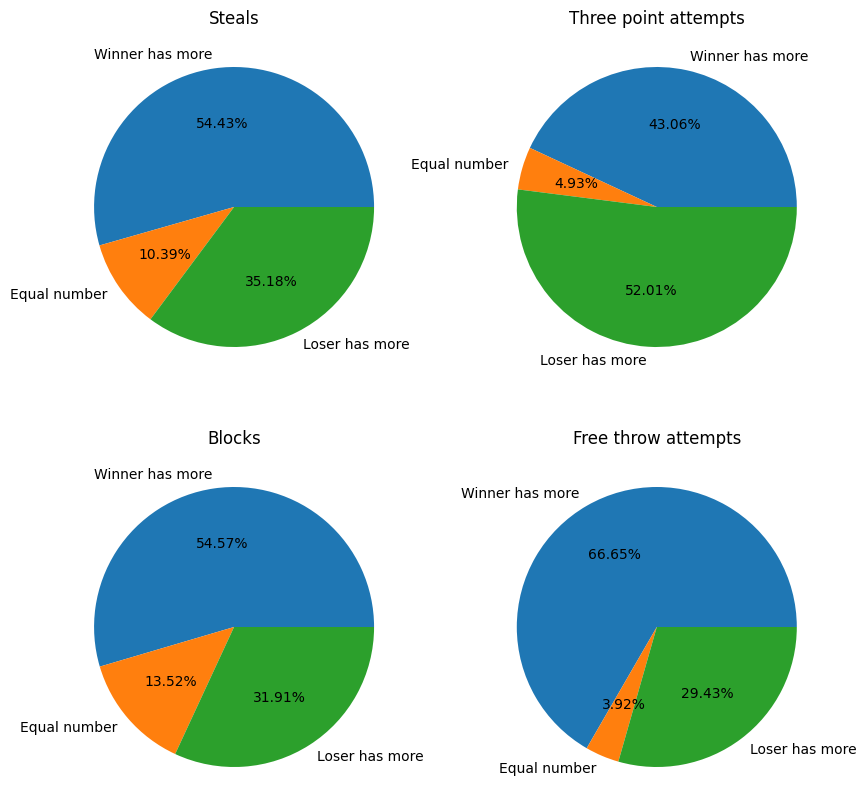

In [70]:
labels = ['Winner has more', 'Equal number', 'Loser has more']
fig, ax = plt.subplots(2, 2, figsize=(10,10))
# plt.subplots_adjust(hspace=0.5, wspace=0.5)
diff = X['WStl'] - X['LStl']

positive_diff = (diff > 0).sum()
zero_diff = (diff == 0).sum()
negative_diff = (diff < 0).sum()

sizes = [positive_diff, zero_diff, negative_diff]
ax[0,0].set_title('Steals')
ax[0,0].pie(sizes, labels=labels, autopct='%.2f%%')


diff = X['WBlk'] - X['LBlk']
positive_diff = (diff > 0).sum()
zero_diff = (diff == 0).sum()
negative_diff = (diff < 0).sum()

sizes = [positive_diff, zero_diff, negative_diff]
ax[1,0].set_title('Blocks')
ax[1,0].pie(sizes, labels=labels, autopct='%.2f%%')

diff = X['WFGA3'] - X['LFGA3']
positive_diff = (diff > 0).sum()
zero_diff = (diff == 0).sum()
negative_diff = (diff < 0).sum()

sizes = [positive_diff, zero_diff, negative_diff]
ax[0,1].set_title('Three point attempts')
ax[0,1].pie(sizes, labels=labels, autopct='%.2f%%')

diff = X['WFTA'] - X['LFTA']
positive_diff = (diff > 0).sum()
zero_diff = (diff == 0).sum()
negative_diff = (diff < 0).sum()

sizes = [positive_diff, zero_diff, negative_diff]
ax[1,1].set_title('Free throw attempts')
ax[1,1].pie(sizes, labels=labels, autopct='%.2f%%')


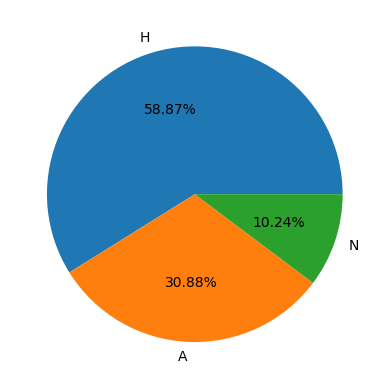

In [79]:
location_counts = X.WLoc.value_counts()
plt.pie(location_counts, labels=location_counts.index, autopct='%.2f%%')
plt.show()

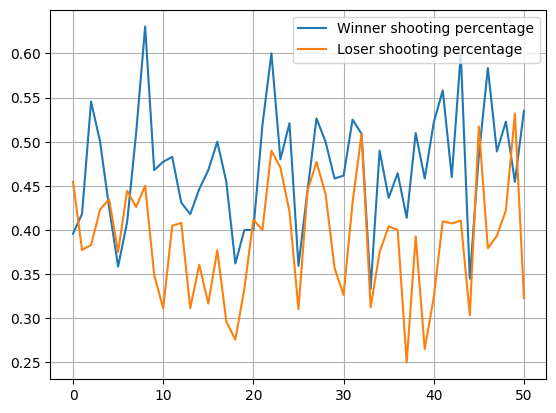

In [95]:
import random
start = random.randint(0,100000)
X_tmp2 = X.loc[start:start+50]
w_shot_percentage = X_tmp2.WFGM / X_tmp2.WFGA
l_shot_percentage = X_tmp2.LFGM / X_tmp2.LFGA
plt.plot([x for x in range(len(w_shot_percentage))], w_shot_percentage, label='Winner shooting percentage')
plt.plot([x for x in range(len(l_shot_percentage))], l_shot_percentage, label='Loser shooting percentage')
plt.grid()
plt.legend()